---
  title: "JPA 02: les relations"
  description: Contrôles des relations entre entités avec JPA.
  categories: 
    - Java
    - I211
    - Lecture
    - JPA  
---

In [1]:
//| output: false
//| echo: false
%mavenRepo central https://repo.maven.apache.org/maven2/
%maven tech.tablesaw:tablesaw-html:0.43.1
%maven tech.tablesaw:tablesaw-core:0.43.1
%maven org.postgresql:postgresql:42.7.1
import tech.tablesaw.io.html.HtmlWriter;

IJava.getKernelInstance().getMagics().registerCellMagic("sqlAsTable", (args, body) -> { 
if (args.size() != 3)
    throw new IllegalArgumentException("Usage: %%sqlAsTable <jdbcUrl> <> <>");
    
String DB_URL = args.get(0);
String LOGIN = args.get(1);
String PASSWORD = args.get(2);
String QUERY = body;
String TABLE_NAME = "LINE";

Connection conn = DriverManager.getConnection(DB_URL,LOGIN,PASSWORD);

tech.tablesaw.api.Table table = null; 
try (Statement stmt = conn.createStatement()) {
  String sql = QUERY;
  try (ResultSet results = stmt.executeQuery(sql)) {
    table = tech.tablesaw.api.Table.read().db(results, TABLE_NAME);
  }
}   
String result = table.write().toString("html");
    
display(result,"text/html");
    return result;
});

In [2]:
//| output: false
//| echo: false

%printWithName false
    
// UPDATE SAMPLE SOURCE CODE

String script="""
export DB_URL=jdbc:postgresql://db/notebook-db
export DB_USERNAME=dba
export DB_PASSWORD=secretsecret
    
GITHUB_REPO=ebpro/sample-hellojpa
GITHUB_URL=https://github.com/${GITHUB_REPO}
BRANCH=develop
SRC_DIR=/home/jovyan/work/src/github/${GITHUB_REPO}
gitpuller ${GITHUB_URL} ${BRANCH} ${SRC_DIR}
cd ${SRC_DIR}
mvn --quiet clean package
""";
IJava.getKernelInstance().getMagics().applyCellMagic("shell",List.of(""),script);  

/* String script="""
export DB_URL=jdbc:postgresql://db/notebook-db
export DB_USERNAME=dba
export DB_PASSWORD=secretsecret
    
GITHUB_REPO=ebpro/minimal-jpa
GITHUB_URL=https://github.com/${GITHUB_REPO}
BRANCH=develop
SRC_DIR=/home/jovyan/work/src/github/${GITHUB_REPO}
gitpuller ${GITHUB_URL} ${BRANCH} ${SRC_DIR}
cd ${SRC_DIR}
mvn --quiet clean package
""";
IJava.getKernelInstance().getMagics().applyCellMagic("shell",List.of(""),script);  */

//LOAD SAMPLE CLASSES
%jars "/home/jovyan/work/src/github/ebpro/sample-hellojpa/target/*-SNAPSHOT-jar-with-dependencies.jar"

//IMPORT MAIN CLASSES
import jakarta.persistence.*;
import fr.univtln.bruno.demos.jpa.hello.DatabaseManager;

//INIT THE DATABASE 
try (EntityManager em = DatabaseManager.getEntityManagerFactory().createEntityManager();) {}

//INIT A LOGGER
import org.slf4j.Logger;
import org.slf4j.LoggerFactory;

Logger log = LoggerFactory.getLogger("notebook");

$ git fetch


$ git reset --mixed


$ git -c user.email=nbgitpuller@nbgitpuller.link -c user.name=nbgitpuller merge -Xours origin/develop


Already up to date.


13:16:49.209 INFO  f.u.b.d.jpa.hello.DatabaseManager - looking for property jakarta.persistence.jdbc.password in variable DB_PASSWORD or in property db.password


13:16:49.212 INFO  f.u.b.d.jpa.hello.DatabaseManager - looking for property jakarta.persistence.jdbc.url in variable DB_URL or in property db.url


13:16:49.212 INFO  f.u.b.d.jpa.hello.DatabaseManager - looking for property jakarta.persistence.jdbc.user in variable DB_USERNAME or in property db.username


13:16:49.212 INFO  f.u.b.d.jpa.hello.DatabaseManager - Connection to jdbc:postgresql://db/notebook-db as dba


13:16:49.928 INFO  com.mchange.v2.log.MLog - MLog clients using slf4j logging.


13:16:51.531 DEBUG org.hibernate.SQL - DROP SCHEMA IF  EXISTS EX_BIOGRAPHY CASCADE


13:16:51.535 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.535 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - drop cascades to table ex_biography.customer


13:16:51.535 DEBUG org.hibernate.SQL - DROP SCHEMA IF  EXISTS EX_ENTITY CASCADE


13:16:51.536 DEBUG org.hibernate.SQL - DROP SCHEMA IF  EXISTS EX_MANY_TO_MANY CASCADE


13:16:51.540 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.540 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - drop cascades to 3 other objects


13:16:51.540 DEBUG org.hibernate.SQL - DROP SCHEMA IF  EXISTS EX_ONE_TO_MANY_A CASCADE


13:16:51.542 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.542 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - drop cascades to 2 other objects


13:16:51.542 DEBUG org.hibernate.SQL - DROP SCHEMA IF  EXISTS EX_ONE_TO_MANY_B CASCADE


13:16:51.543 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.543 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - drop cascades to 2 other objects


13:16:51.543 DEBUG org.hibernate.SQL - DROP SCHEMA IF  EXISTS EX_HOOK CASCADE


13:16:51.544 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.544 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - drop cascades to table ex_hook.customer


13:16:51.544 DEBUG org.hibernate.SQL - DROP SCHEMA IF  EXISTS EX_EMBEDDED_ID CASCADE


13:16:51.549 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.549 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - drop cascades to table ex_embedded_id.employe


13:16:51.549 DEBUG org.hibernate.SQL - DROP SCHEMA IF  EXISTS EX_IDCLASS CASCADE


13:16:51.550 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.550 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - drop cascades to table ex_idclass.employe


13:16:51.550 DEBUG org.hibernate.SQL - DROP SCHEMA IF  EXISTS EX_IDCLASS CASCADE


13:16:51.551 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.551 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - schema "ex_idclass" does not exist, skipping


13:16:51.551 DEBUG org.hibernate.SQL - DROP SCHEMA IF  EXISTS EX_HERITAGE1 CASCADE


13:16:51.559 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.559 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - drop cascades to table ex_heritage1.person


13:16:51.559 DEBUG org.hibernate.SQL - DROP SCHEMA IF  EXISTS EX_HERITAGE2 CASCADE


13:16:51.568 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.568 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - drop cascades to 3 other objects


13:16:51.568 DEBUG org.hibernate.SQL - DROP SCHEMA IF  EXISTS EX_HERITAGE3 CASCADE


13:16:51.572 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.572 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - drop cascades to 3 other objects


13:16:51.572 DEBUG org.hibernate.SQL - drop table if exists ex_biography.CUSTOMER cascade


13:16:51.573 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.573 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - schema "ex_biography" does not exist, skipping


13:16:51.573 DEBUG org.hibernate.SQL - drop table if exists EX_EMBEDDED_ID.EMPLOYE cascade


13:16:51.573 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.573 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - schema "ex_embedded_id" does not exist, skipping


13:16:51.573 DEBUG org.hibernate.SQL - drop table if exists EX_HERITAGE1.Person cascade


13:16:51.573 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.573 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - schema "ex_heritage1" does not exist, skipping


13:16:51.574 DEBUG org.hibernate.SQL - alter table if exists EX_HERITAGE2.STUDENT drop constraint if exists FKbhp183l5ur0m48nhfqjtodwt7


13:16:51.574 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.574 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - relation "student" does not exist, skipping


13:16:51.574 DEBUG org.hibernate.SQL - alter table if exists EX_HERITAGE2.TEACHER drop constraint if exists FKeiv4tioua2f6b81bwlpje2d8t


13:16:51.574 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.574 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - relation "teacher" does not exist, skipping


13:16:51.574 DEBUG org.hibernate.SQL - drop table if exists EX_HERITAGE2.PERSON cascade


13:16:51.574 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.575 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - schema "ex_heritage2" does not exist, skipping


13:16:51.575 DEBUG org.hibernate.SQL - drop table if exists EX_HERITAGE2.STUDENT cascade


13:16:51.575 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.575 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - schema "ex_heritage2" does not exist, skipping


13:16:51.575 DEBUG org.hibernate.SQL - drop table if exists EX_HERITAGE2.TEACHER cascade


13:16:51.575 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.575 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - schema "ex_heritage2" does not exist, skipping


13:16:51.575 DEBUG org.hibernate.SQL - drop table if exists EX_HERITAGE3.PERSON cascade


13:16:51.575 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.575 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - schema "ex_heritage3" does not exist, skipping


13:16:51.575 DEBUG org.hibernate.SQL - drop table if exists EX_HERITAGE3.STUDENT cascade


13:16:51.576 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.576 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - schema "ex_heritage3" does not exist, skipping


13:16:51.576 DEBUG org.hibernate.SQL - drop table if exists EX_HERITAGE3.TEACHER cascade


13:16:51.576 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.576 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - schema "ex_heritage3" does not exist, skipping


13:16:51.576 DEBUG org.hibernate.SQL - drop table if exists EX_HOOK.CUSTOMER cascade


13:16:51.576 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.576 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - schema "ex_hook" does not exist, skipping


13:16:51.576 DEBUG org.hibernate.SQL - drop table if exists EX_IDCLASS.EMPLOYE cascade


13:16:51.577 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.577 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - schema "ex_idclass" does not exist, skipping


13:16:51.577 DEBUG org.hibernate.SQL - drop table if exists EX_IDSEQ.CUSTOMER cascade


13:16:51.578 DEBUG org.hibernate.SQL - drop table if exists EX_IDTABLE.CUSTOMER cascade


13:16:51.579 DEBUG org.hibernate.SQL - drop table if exists EX_IDTABLE.ID_GENERATOR_TABLE cascade


13:16:51.579 DEBUG org.hibernate.SQL - alter table if exists EX_MANY_TO_MANY.CUSTOMER_ADDRESS drop constraint if exists FKcl977kx0vb0mvbvk84kl4lqcv


13:16:51.580 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.580 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - relation "customer_address" does not exist, skipping


13:16:51.580 DEBUG org.hibernate.SQL - alter table if exists EX_MANY_TO_MANY.CUSTOMER_ADDRESS drop constraint if exists FKhqfehryv5ajn01d0bnvn7b55e


13:16:51.580 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.580 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - relation "customer_address" does not exist, skipping


13:16:51.580 DEBUG org.hibernate.SQL - drop table if exists EX_MANY_TO_MANY.ADDRESS cascade


13:16:51.580 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.580 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - schema "ex_many_to_many" does not exist, skipping


13:16:51.580 DEBUG org.hibernate.SQL - drop table if exists EX_MANY_TO_MANY.CUSTOMER cascade


13:16:51.580 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.581 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - schema "ex_many_to_many" does not exist, skipping


13:16:51.581 DEBUG org.hibernate.SQL - drop table if exists EX_MANY_TO_MANY.CUSTOMER_ADDRESS cascade


13:16:51.581 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.581 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - schema "ex_many_to_many" does not exist, skipping


13:16:51.581 DEBUG org.hibernate.SQL - alter table if exists EX_ONE_TO_MANY_A.LINE drop constraint if exists FKtiwu942eblywp71x5p8agmhm9


13:16:51.581 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.581 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - relation "line" does not exist, skipping


13:16:51.581 DEBUG org.hibernate.SQL - drop table if exists EX_ONE_TO_MANY_A.EORDER cascade


13:16:51.581 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.581 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - schema "ex_one_to_many_a" does not exist, skipping


13:16:51.582 DEBUG org.hibernate.SQL - drop table if exists EX_ONE_TO_MANY_A.LINE cascade


13:16:51.582 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.582 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - schema "ex_one_to_many_a" does not exist, skipping


13:16:51.582 DEBUG org.hibernate.SQL - alter table if exists EX_ONE_TO_MANY_B.LINE drop constraint if exists FKk9141l2uxmt4wtydt7dxfcgm3


13:16:51.582 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.582 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - relation "line" does not exist, skipping


13:16:51.582 DEBUG org.hibernate.SQL - drop table if exists EX_ONE_TO_MANY_B.EORDER cascade


13:16:51.582 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.582 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - schema "ex_one_to_many_b" does not exist, skipping


13:16:51.582 DEBUG org.hibernate.SQL - drop table if exists EX_ONE_TO_MANY_B.LINE cascade


13:16:51.583 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 00000


13:16:51.583 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - schema "ex_one_to_many_b" does not exist, skipping


13:16:51.583 DEBUG org.hibernate.SQL - drop table if exists EX_SIMPLE.CUSTOMER cascade


13:16:51.584 DEBUG org.hibernate.SQL - drop table if exists EX_UUID.CUSTOMER cascade


13:16:51.585 DEBUG org.hibernate.SQL - drop table if exists CUSTOMER cascade


13:16:51.586 DEBUG org.hibernate.SQL - drop table if exists CUSTOMER_BASE cascade


13:16:51.586 DEBUG org.hibernate.SQL - drop table if exists CUSTOMER_BIS cascade


13:16:51.587 DEBUG org.hibernate.SQL - drop sequence if exists ADDRESS_SEQ


13:16:51.588 DEBUG org.hibernate.SQL - drop sequence if exists CUSTOMER_BASE_SEQ


13:16:51.588 DEBUG org.hibernate.SQL - drop sequence if exists CUSTOMER_BIS_SEQ


13:16:51.589 DEBUG org.hibernate.SQL - drop sequence if exists CUSTOMER_SEQ


13:16:51.589 DEBUG org.hibernate.SQL - drop sequence if exists CUSTOMER_SEQUENCE


13:16:51.590 DEBUG org.hibernate.SQL - drop sequence if exists EORDER_SEQ


13:16:51.590 DEBUG org.hibernate.SQL - drop sequence if exists LINE_SEQ


13:16:51.591 DEBUG org.hibernate.SQL - drop sequence if exists PERSON_SEQ


13:16:51.594 DEBUG org.hibernate.SQL - CREATE SCHEMA IF NOT EXISTS EX_SIMPLE


13:16:51.594 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 42P06


13:16:51.594 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - schema "ex_simple" already exists, skipping


13:16:51.594 DEBUG org.hibernate.SQL - CREATE SCHEMA IF NOT EXISTS EX_ENTITY


13:16:51.595 DEBUG org.hibernate.SQL - CREATE SCHEMA IF NOT EXISTS EX_MANY_TO_MANY


13:16:51.595 DEBUG org.hibernate.SQL - CREATE SCHEMA IF NOT EXISTS EX_ONE_TO_MANY_A


13:16:51.596 DEBUG org.hibernate.SQL - CREATE SCHEMA IF NOT EXISTS EX_ONE_TO_MANY_B


13:16:51.596 DEBUG org.hibernate.SQL - CREATE SCHEMA IF NOT EXISTS EX_BIOGRAPHY


13:16:51.596 DEBUG org.hibernate.SQL - CREATE SCHEMA IF NOT EXISTS EX_HOOK


13:16:51.596 DEBUG org.hibernate.SQL - CREATE SCHEMA IF NOT EXISTS EX_UUID


13:16:51.596 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 42P06


13:16:51.597 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - schema "ex_uuid" already exists, skipping


13:16:51.597 DEBUG org.hibernate.SQL - CREATE SCHEMA IF NOT EXISTS EX_HERITAGE1


13:16:51.597 DEBUG org.hibernate.SQL - CREATE SCHEMA IF NOT EXISTS EX_HERITAGE2


13:16:51.597 DEBUG org.hibernate.SQL - CREATE SCHEMA IF NOT EXISTS EX_HERITAGE3


13:16:51.597 DEBUG org.hibernate.SQL - CREATE SCHEMA IF NOT EXISTS EX_EMBEDDED_ID


13:16:51.598 DEBUG org.hibernate.SQL - CREATE SCHEMA IF NOT EXISTS EX_IDCLASS


13:16:51.598 DEBUG org.hibernate.SQL - CREATE SCHEMA IF NOT EXISTS EX_IDSEQ


13:16:51.598 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 42P06


13:16:51.598 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - schema "ex_idseq" already exists, skipping


13:16:51.598 DEBUG org.hibernate.SQL - CREATE SCHEMA IF NOT EXISTS EX_IDTABLE


13:16:51.598 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - SQL Warning Code: 0, SQLState: 42P06


13:16:51.598 WARN  o.h.e.jdbc.spi.SqlExceptionHelper - schema "ex_idtable" already exists, skipping


13:16:51.600 DEBUG org.hibernate.SQL - create table ex_biography.CUSTOMER (id bigint not null, name varchar(50) not null, BIO_BRIEF varchar(255), BIO_EXTENDED oid, primary key (id))


13:16:51.603 DEBUG org.hibernate.SQL - create table EX_EMBEDDED_ID.EMPLOYE (rankInDepartment integer not null, department varchar(255) not null, name varchar(255), primary key (rankInDepartment, department))


13:16:51.605 DEBUG org.hibernate.SQL - create table EX_HERITAGE1.Person (salary float(53), status smallint check (status between 0 and 1), id bigint not null, DTYPE varchar(31) not null, name varchar(255), primary key (id))


13:16:51.607 DEBUG org.hibernate.SQL - create table EX_HERITAGE2.PERSON (id bigint not null, name varchar(255), primary key (id))


13:16:51.609 DEBUG org.hibernate.SQL - create table EX_HERITAGE2.STUDENT (status smallint not null check (status between 0 and 1), id bigint not null, primary key (id))


13:16:51.610 DEBUG org.hibernate.SQL - create table EX_HERITAGE2.TEACHER (salary float(53) not null, id bigint not null, primary key (id))


13:16:51.612 DEBUG org.hibernate.SQL - create table EX_HERITAGE3.PERSON (id bigint not null, name varchar(255), primary key (id))


13:16:51.613 DEBUG org.hibernate.SQL - create table EX_HERITAGE3.STUDENT (status smallint not null check (status between 0 and 1), id bigint not null, name varchar(255), primary key (id))


13:16:51.614 DEBUG org.hibernate.SQL - create table EX_HERITAGE3.TEACHER (salary float(53) not null, id bigint not null, name varchar(255), primary key (id))


13:16:51.625 DEBUG org.hibernate.SQL - create table EX_HOOK.CUSTOMER (id bigint not null, name varchar(255), primary key (id))


13:16:51.631 DEBUG org.hibernate.SQL - create table EX_IDCLASS.EMPLOYE (rankInDepartment integer not null, department varchar(255) not null, name varchar(255), primary key (rankInDepartment, department))


13:16:51.637 DEBUG org.hibernate.SQL - create table EX_IDSEQ.CUSTOMER (id bigint not null, name varchar(255), primary key (id))


13:16:51.641 DEBUG org.hibernate.SQL - create table EX_IDTABLE.CUSTOMER (id bigint not null, name varchar(255), primary key (id))


13:16:51.646 DEBUG org.hibernate.SQL - create table EX_IDTABLE.ID_GENERATOR_TABLE (next_val bigint, sequence_name varchar(255) not null, primary key (sequence_name))


13:16:51.650 DEBUG org.hibernate.SQL - insert into EX_IDTABLE.ID_GENERATOR_TABLE(sequence_name, next_val) values ('CUSTOMER',0)


13:16:51.653 DEBUG org.hibernate.SQL - create table EX_MANY_TO_MANY.ADDRESS (id bigint not null, addressDetail varchar(255), primary key (id))


13:16:51.655 DEBUG org.hibernate.SQL - create table EX_MANY_TO_MANY.CUSTOMER (id bigint not null, name varchar(255), primary key (id))


13:16:51.657 DEBUG org.hibernate.SQL - create table EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id bigint not null, places_id bigint not null, primary key (occupants_id, places_id))


13:16:51.659 DEBUG org.hibernate.SQL - create table EX_ONE_TO_MANY_A.EORDER (date timestamp(6), id bigint not null, primary key (id))


13:16:51.660 DEBUG org.hibernate.SQL - create table EX_ONE_TO_MANY_A.LINE (price float(53) not null, id bigint not null, order_id bigint not null, product varchar(255), primary key (id))


13:16:51.662 DEBUG org.hibernate.SQL - create table EX_ONE_TO_MANY_B.EORDER (date timestamp(6) not null, id bigint not null, primary key (id))


13:16:51.664 DEBUG org.hibernate.SQL - create table EX_ONE_TO_MANY_B.LINE (price float(53), OrderOneToManyB_id bigint not null, product varchar(255))


13:16:51.664 DEBUG org.hibernate.SQL - create table EX_SIMPLE.CUSTOMER (id bigint not null, email varchar(255), name varchar(255), primary key (id))


13:16:51.667 DEBUG org.hibernate.SQL - create table EX_UUID.CUSTOMER (uuid uuid not null, name varchar(50) not null, primary key (uuid))


13:16:51.670 DEBUG org.hibernate.SQL - create sequence ADDRESS_SEQ start with 1 increment by 50


13:16:51.671 DEBUG org.hibernate.SQL - create sequence CUSTOMER_BASE_SEQ start with 1 increment by 50


13:16:51.672 DEBUG org.hibernate.SQL - create sequence CUSTOMER_BIS_SEQ start with 1 increment by 50


13:16:51.672 DEBUG org.hibernate.SQL - create sequence CUSTOMER_SEQ start with 1 increment by 50


13:16:51.673 DEBUG org.hibernate.SQL - create sequence CUSTOMER_SEQUENCE start with 1 increment by 10


13:16:51.673 DEBUG org.hibernate.SQL - create sequence EORDER_SEQ start with 1 increment by 50


13:16:51.674 DEBUG org.hibernate.SQL - create sequence LINE_SEQ start with 1 increment by 50


13:16:51.674 DEBUG org.hibernate.SQL - create sequence PERSON_SEQ start with 1 increment by 50


13:16:51.675 DEBUG org.hibernate.SQL - create table CUSTOMER (birthDate date, status smallint check (status between 0 and 1), version integer, ID bigint not null, creationDate timestamp(6), email varchar(50) not null unique, firstname varchar(50) not null, lastname varchar(50) not null, photo oid, primary key (ID))


13:16:51.678 DEBUG org.hibernate.SQL - create table CUSTOMER_BASE (id bigint not null, name varchar(50) not null, primary key (id))


13:16:51.679 DEBUG org.hibernate.SQL - create table CUSTOMER_BIS (id bigint not null, name varchar(255), primary key (id))


13:16:51.681 DEBUG org.hibernate.SQL - alter table if exists EX_HERITAGE2.STUDENT add constraint FKbhp183l5ur0m48nhfqjtodwt7 foreign key (id) references EX_HERITAGE2.PERSON


13:16:51.682 DEBUG org.hibernate.SQL - alter table if exists EX_HERITAGE2.TEACHER add constraint FKeiv4tioua2f6b81bwlpje2d8t foreign key (id) references EX_HERITAGE2.PERSON


13:16:51.683 DEBUG org.hibernate.SQL - alter table if exists EX_MANY_TO_MANY.CUSTOMER_ADDRESS add constraint FKcl977kx0vb0mvbvk84kl4lqcv foreign key (places_id) references EX_MANY_TO_MANY.ADDRESS


13:16:51.684 DEBUG org.hibernate.SQL - alter table if exists EX_MANY_TO_MANY.CUSTOMER_ADDRESS add constraint FKhqfehryv5ajn01d0bnvn7b55e foreign key (occupants_id) references EX_MANY_TO_MANY.CUSTOMER


13:16:51.685 DEBUG org.hibernate.SQL - alter table if exists EX_ONE_TO_MANY_A.LINE add constraint FKtiwu942eblywp71x5p8agmhm9 foreign key (order_id) references EX_ONE_TO_MANY_A.EORDER


13:16:51.686 DEBUG org.hibernate.SQL - alter table if exists EX_ONE_TO_MANY_B.LINE add constraint FKk9141l2uxmt4wtydt7dxfcgm3 foreign key (OrderOneToManyB_id) references EX_ONE_TO_MANY_B.EORDER


13:16:51.726 DEBUG org.hibernate.SQL - select tbl.next_val from EX_IDTABLE.ID_GENERATOR_TABLE tbl where tbl.sequence_name=? for update of tbl


13:16:51.728 DEBUG org.hibernate.SQL - update EX_IDTABLE.ID_GENERATOR_TABLE set next_val=?  where next_val=? and sequence_name=?


13:16:51.736 DEBUG org.hibernate.SQL - select tbl.next_val from EX_IDTABLE.ID_GENERATOR_TABLE tbl where tbl.sequence_name=? for update of tbl


13:16:51.737 DEBUG org.hibernate.SQL - update EX_IDTABLE.ID_GENERATOR_TABLE set next_val=?  where next_val=? and sequence_name=?


13:16:51.750 DEBUG org.hibernate.SQL - insert into EX_IDTABLE.CUSTOMER (name,id) values (?,?)


13:16:51.752 DEBUG org.hibernate.SQL - insert into EX_IDTABLE.CUSTOMER (name,id) values (?,?)


13:16:51.774 DEBUG org.hibernate.SQL - select c1_0.id,c1_0.name from EX_IDTABLE.CUSTOMER c1_0 where c1_0.id=?


13:16:51.777 DEBUG org.hibernate.SQL - select c1_0.id,c1_0.name from EX_IDTABLE.CUSTOMER c1_0 where c1_0.id=?


13:16:51.790 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQ')


13:16:51.793 DEBUG org.hibernate.SQL - insert into ex_biography.CUSTOMER (BIO_BRIEF,BIO_EXTENDED,name,id) values (?,?,?,?)


13:16:51.808 DEBUG org.hibernate.SQL - select c1_0.id,c1_0.BIO_BRIEF,c1_0.BIO_EXTENDED,c1_0.name from ex_biography.CUSTOMER c1_0 where c1_0.id=?


13:16:51.823 DEBUG org.hibernate.SQL - insert into EX_IDCLASS.EMPLOYE (name,department,rankInDepartment) values (?,?,?)


13:16:51.827 DEBUG org.hibernate.SQL - insert into EX_IDCLASS.EMPLOYE (name,department,rankInDepartment) values (?,?,?)


13:16:51.829 DEBUG org.hibernate.SQL - select e1_0.department,e1_0.rankInDepartment,e1_0.name from EX_IDCLASS.EMPLOYE e1_0 where (e1_0.department,e1_0.rankInDepartment) in ((?,?))


13:16:51.997 DEBUG org.hibernate.SQL - insert into EX_UUID.CUSTOMER (name,uuid) values (?,?)


13:16:51.998 DEBUG org.hibernate.SQL - insert into EX_UUID.CUSTOMER (name,uuid) values (?,?)


13:16:51.998 DEBUG org.hibernate.SQL - insert into EX_UUID.CUSTOMER (name,uuid) values (?,?)


13:16:51.998 DEBUG org.hibernate.SQL - insert into EX_UUID.CUSTOMER (name,uuid) values (?,?)


13:16:51.998 DEBUG org.hibernate.SQL - insert into EX_UUID.CUSTOMER (name,uuid) values (?,?)


13:16:52.196 DEBUG org.hibernate.SQL - select c1_0.uuid,c1_0.name from EX_UUID.CUSTOMER c1_0 fetch first ? rows only


13:16:52.198 INFO  f.u.bruno.demos.jpa.hello.UUIDTest - Customer(uuid=ae25ea30-763a-4a10-82fc-e0be48372193, name=Jared Ondricka)


13:16:52.198 INFO  f.u.bruno.demos.jpa.hello.UUIDTest - Customer(uuid=53cd37f6-7083-4742-9412-3d0f0af84cfb, name=Kay VonRueden)


13:16:52.198 INFO  f.u.bruno.demos.jpa.hello.UUIDTest - Customer(uuid=5b8b8d76-980b-4469-9648-73e0747a1123, name=Abram Marks)


13:16:52.198 INFO  f.u.bruno.demos.jpa.hello.UUIDTest - Customer(uuid=c365709c-e9ba-4914-87d2-b40656e338ef, name=Magdalene Reichel)


13:16:52.198 INFO  f.u.bruno.demos.jpa.hello.UUIDTest - Customer(uuid=82a7df79-6eb2-4b8b-ada3-b644a8eaa5b1, name=Winnifred Champlin)


13:16:52.201 DEBUG org.hibernate.SQL - select nextval('PERSON_SEQ')


13:16:52.202 DEBUG org.hibernate.SQL - select nextval('PERSON_SEQ')


13:16:52.204 DEBUG org.hibernate.SQL - insert into EX_HERITAGE1.Person (name,status,DTYPE,id) values (?,?,'Student',?)


13:16:52.205 DEBUG org.hibernate.SQL - insert into EX_HERITAGE1.Person (name,salary,DTYPE,id) values (?,?,'Teacher',?)


13:16:52.205 DEBUG org.hibernate.SQL - select s1_0.id,s1_0.name,s1_0.status from EX_HERITAGE1.Person s1_0 where s1_0.DTYPE='Student' and s1_0.id=?


13:16:52.206 DEBUG org.hibernate.SQL - select t1_0.id,t1_0.name,t1_0.salary from EX_HERITAGE1.Person t1_0 where t1_0.DTYPE='Teacher' and t1_0.id=?


13:16:52.210 DEBUG org.hibernate.SQL - select nextval('EORDER_SEQ')


13:16:52.215 DEBUG org.hibernate.SQL - select nextval('EORDER_SEQ')


13:16:52.218 DEBUG org.hibernate.SQL - insert into EX_ONE_TO_MANY_B.EORDER (date,id) values (?,?)


13:16:52.219 DEBUG org.hibernate.SQL - insert into EX_ONE_TO_MANY_B.EORDER (date,id) values (?,?)


13:16:52.224 DEBUG org.hibernate.SQL - insert into EX_ONE_TO_MANY_B.LINE (OrderOneToManyB_id,price,product) values (?,?,?)


13:16:52.224 DEBUG org.hibernate.SQL - insert into EX_ONE_TO_MANY_B.LINE (OrderOneToManyB_id,price,product) values (?,?,?)


13:16:52.225 DEBUG org.hibernate.SQL - insert into EX_ONE_TO_MANY_B.LINE (OrderOneToManyB_id,price,product) values (?,?,?)


13:16:52.225 DEBUG org.hibernate.SQL - insert into EX_ONE_TO_MANY_B.LINE (OrderOneToManyB_id,price,product) values (?,?,?)


13:16:52.227 DEBUG org.hibernate.SQL - select o1_0.id,o1_0.date from EX_ONE_TO_MANY_B.EORDER o1_0 where o1_0.id=?


13:16:52.231 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQUENCE')


13:16:52.232 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQUENCE')


13:16:52.232 DEBUG org.hibernate.SQL - insert into EX_IDSEQ.CUSTOMER (name,id) values (?,?)


13:16:52.233 DEBUG org.hibernate.SQL - insert into EX_IDSEQ.CUSTOMER (name,id) values (?,?)


13:16:52.234 DEBUG org.hibernate.SQL - select c1_0.id,c1_0.name from EX_IDSEQ.CUSTOMER c1_0 where c1_0.id=?


13:16:52.234 DEBUG org.hibernate.SQL - select c1_0.id,c1_0.name from EX_IDSEQ.CUSTOMER c1_0 where c1_0.id=?


13:16:52.238 DEBUG org.hibernate.SQL - insert into EX_EMBEDDED_ID.EMPLOYE (name,department,rankInDepartment) values (?,?,?)


13:16:52.240 DEBUG org.hibernate.SQL - insert into EX_EMBEDDED_ID.EMPLOYE (name,department,rankInDepartment) values (?,?,?)


13:16:52.241 DEBUG org.hibernate.SQL - select e1_0.department,e1_0.rankInDepartment,e1_0.name from EX_EMBEDDED_ID.EMPLOYE e1_0 where (e1_0.department,e1_0.rankInDepartment) in ((?,?))


13:16:52.263 DEBUG org.hibernate.SQL - select nextval('ADDRESS_SEQ')


13:16:52.264 DEBUG org.hibernate.SQL - select nextval('ADDRESS_SEQ')


13:16:52.268 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.ADDRESS (addressDetail,id) values (?,?)


13:16:52.269 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.ADDRESS (addressDetail,id) values (?,?)


13:16:52.270 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.ADDRESS (addressDetail,id) values (?,?)


13:16:52.270 DEBUG org.hibernate.SQL - select a1_0.id,a1_0.addressDetail from EX_MANY_TO_MANY.ADDRESS a1_0 order by random() fetch first ? rows only


13:16:52.271 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQ')


13:16:52.273 DEBUG org.hibernate.SQL - select a1_0.id,a1_0.addressDetail from EX_MANY_TO_MANY.ADDRESS a1_0 order by random() fetch first ? rows only


13:16:52.276 DEBUG org.hibernate.SQL - select a1_0.id,a1_0.addressDetail from EX_MANY_TO_MANY.ADDRESS a1_0 order by random() fetch first ? rows only


13:16:52.277 DEBUG org.hibernate.SQL - select a1_0.id,a1_0.addressDetail from EX_MANY_TO_MANY.ADDRESS a1_0 order by random() fetch first ? rows only


13:16:52.278 DEBUG org.hibernate.SQL - select a1_0.id,a1_0.addressDetail from EX_MANY_TO_MANY.ADDRESS a1_0 order by random() fetch first ? rows only


13:16:52.280 DEBUG org.hibernate.SQL - select a1_0.id,a1_0.addressDetail from EX_MANY_TO_MANY.ADDRESS a1_0 order by random() fetch first ? rows only


13:16:52.280 DEBUG org.hibernate.SQL - select a1_0.id,a1_0.addressDetail from EX_MANY_TO_MANY.ADDRESS a1_0 order by random() fetch first ? rows only


13:16:52.281 DEBUG org.hibernate.SQL - select a1_0.id,a1_0.addressDetail from EX_MANY_TO_MANY.ADDRESS a1_0 order by random() fetch first ? rows only


13:16:52.282 DEBUG org.hibernate.SQL - select a1_0.id,a1_0.addressDetail from EX_MANY_TO_MANY.ADDRESS a1_0 order by random() fetch first ? rows only


13:16:52.283 DEBUG org.hibernate.SQL - select a1_0.id,a1_0.addressDetail from EX_MANY_TO_MANY.ADDRESS a1_0 order by random() fetch first ? rows only


13:16:52.284 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER (name,id) values (?,?)


13:16:52.285 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER (name,id) values (?,?)


13:16:52.285 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER (name,id) values (?,?)


13:16:52.286 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER (name,id) values (?,?)


13:16:52.286 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER (name,id) values (?,?)


13:16:52.286 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER (name,id) values (?,?)


13:16:52.286 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER (name,id) values (?,?)


13:16:52.287 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER (name,id) values (?,?)


13:16:52.287 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER (name,id) values (?,?)


13:16:52.287 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER (name,id) values (?,?)


13:16:52.288 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.289 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.289 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.289 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.290 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.290 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.290 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.290 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.291 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.291 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.291 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.291 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.292 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.292 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.292 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.293 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.293 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.293 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.293 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.293 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.294 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.294 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.294 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.294 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.295 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.295 DEBUG org.hibernate.SQL - insert into EX_MANY_TO_MANY.CUSTOMER_ADDRESS (occupants_id,places_id) values (?,?)


13:16:52.298 DEBUG org.hibernate.SQL - select nextval('PERSON_SEQ')


13:16:52.301 DEBUG org.hibernate.SQL - insert into EX_HERITAGE2.PERSON (name,id) values (?,?)


13:16:52.301 DEBUG org.hibernate.SQL - insert into EX_HERITAGE2.STUDENT (status,id) values (?,?)


13:16:52.302 DEBUG org.hibernate.SQL - insert into EX_HERITAGE2.PERSON (name,id) values (?,?)


13:16:52.302 DEBUG org.hibernate.SQL - insert into EX_HERITAGE2.TEACHER (salary,id) values (?,?)


13:16:52.303 DEBUG org.hibernate.SQL - select s1_0.id,s1_1.name,s1_0.status from EX_HERITAGE2.STUDENT s1_0 join EX_HERITAGE2.PERSON s1_1 on s1_0.id=s1_1.id where s1_0.id=?


13:16:52.304 DEBUG org.hibernate.SQL - select t1_0.id,t1_1.name,t1_0.salary from EX_HERITAGE2.TEACHER t1_0 join EX_HERITAGE2.PERSON t1_1 on t1_0.id=t1_1.id where t1_0.id=?


13:16:52.307 INFO  f.u.b.d.jpa.hello.HookListenerTest - CustomerWithListener(id=0, name=Peter)


13:16:52.307 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_BIS_SEQ')


13:16:52.308 INFO  f.u.b.d.j.h.s.e.EntityMonitorListener - -->about to change in DB: CustomerWithListener(id=1, name=Peter)


13:16:52.308 INFO  f.u.b.d.j.h.s.e.EntityMonitorListener - -->about to change in DB: CustomerWithListener(id=1, name=Pierre)


13:16:52.309 DEBUG org.hibernate.SQL - insert into CUSTOMER_BIS (name,id) values (?,?)


13:16:52.310 INFO  f.u.b.d.j.h.s.e.EntityMonitorListener - --> changed in DBCustomerWithListener(id=1, name=Pierre)


13:16:52.312 DEBUG org.hibernate.SQL - update CUSTOMER_BIS set name=? where id=?


13:16:52.315 INFO  f.u.b.d.j.h.s.e.EntityMonitorListener - --> changed in DBCustomerWithListener(id=1, name=Pierre)


13:16:52.315 DEBUG org.hibernate.SQL - select cwl1_0.id,cwl1_0.name from CUSTOMER_BIS cwl1_0 where cwl1_0.id=?


13:16:52.316 INFO  f.u.b.d.j.h.s.e.EntityMonitorListener - --> loaded from DB: CustomerWithListener(id=1, name=Pierre)


13:16:52.317 INFO  f.u.b.d.j.h.s.e.EntityMonitorListener - -->about to change in DB: CustomerWithListener(id=1, name=Pierre)


13:16:52.319 DEBUG org.hibernate.SQL - delete from CUSTOMER_BIS where id=?


13:16:52.321 INFO  f.u.b.d.j.h.s.e.EntityMonitorListener - --> changed in DBCustomerWithListener(id=1, name=Pierre)


13:16:52.324 DEBUG org.hibernate.SQL - select nextval('EORDER_SEQ')


13:16:52.327 DEBUG org.hibernate.SQL - select nextval('LINE_SEQ')


13:16:52.329 DEBUG org.hibernate.SQL - select nextval('LINE_SEQ')


13:16:52.331 DEBUG org.hibernate.SQL - insert into EX_ONE_TO_MANY_A.EORDER (date,id) values (?,?)


13:16:52.332 DEBUG org.hibernate.SQL - insert into EX_ONE_TO_MANY_A.LINE (order_id,price,product,id) values (?,?,?,?)


13:16:52.333 DEBUG org.hibernate.SQL - insert into EX_ONE_TO_MANY_A.LINE (order_id,price,product,id) values (?,?,?,?)


13:16:52.333 DEBUG org.hibernate.SQL - insert into EX_ONE_TO_MANY_A.LINE (order_id,price,product,id) values (?,?,?,?)


13:16:52.333 DEBUG org.hibernate.SQL - insert into EX_ONE_TO_MANY_A.EORDER (date,id) values (?,?)


13:16:52.334 DEBUG org.hibernate.SQL - insert into EX_ONE_TO_MANY_A.LINE (order_id,price,product,id) values (?,?,?,?)


13:16:52.334 DEBUG org.hibernate.SQL - insert into EX_ONE_TO_MANY_A.LINE (order_id,price,product,id) values (?,?,?,?)


13:16:52.337 DEBUG org.hibernate.SQL - select o1_0.id,o1_0.date from EX_ONE_TO_MANY_A.EORDER o1_0


13:16:52.406 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.408 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQ')


13:16:52.409 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.410 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.411 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.411 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.412 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.413 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.414 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.414 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.415 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.416 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.417 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.417 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.418 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.419 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.420 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.420 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.421 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.421 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.422 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.423 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.424 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.424 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.425 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.425 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.426 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.426 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.427 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.428 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.429 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.429 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.430 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.431 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.432 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.432 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.433 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.433 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.434 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.436 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.438 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.439 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.440 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.441 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.442 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.442 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.443 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.444 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.445 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.445 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.446 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.447 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.448 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.448 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.449 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.450 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.451 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.451 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.452 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.453 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.454 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.454 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.455 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.455 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.456 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.456 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.457 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.457 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.458 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.458 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.459 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.460 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.460 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.461 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.461 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.462 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.462 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.463 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.463 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.464 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.464 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.465 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.465 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.466 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.466 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.467 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.467 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.468 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.468 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.469 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.470 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.471 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.472 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.472 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.473 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.474 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.475 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.475 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.476 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.476 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.477 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.477 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.477 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQ')


13:16:52.478 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.478 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.479 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.480 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.481 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.482 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.482 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.483 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.484 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.485 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.486 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.487 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.488 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.489 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.490 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.490 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.491 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.491 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.492 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.492 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.493 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.494 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.494 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.495 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.496 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.496 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.498 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.498 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.500 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.500 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.501 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.502 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.502 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.503 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.504 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.505 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.505 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.506 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.507 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.507 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.508 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.508 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.509 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.509 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.510 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.511 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.511 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.512 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.513 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.513 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.514 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.514 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.515 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.516 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.516 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.517 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.517 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.518 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.519 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.519 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.520 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.524 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.525 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.525 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.526 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.526 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.527 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.527 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.528 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.528 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.529 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.529 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.530 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.530 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.531 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.531 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.532 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.533 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.534 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.534 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.535 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.535 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.536 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.536 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.537 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.537 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.538 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.538 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.539 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.539 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.540 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.540 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.541 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.541 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.541 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.542 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.542 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.543 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.543 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.544 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.544 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQ')


13:16:52.545 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.545 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.545 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.546 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.546 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.547 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.547 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.548 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.548 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.549 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.549 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.549 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.550 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.550 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.551 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.551 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.551 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.552 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.553 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.553 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.554 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.555 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.557 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.558 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.560 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.562 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.564 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.565 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.566 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.567 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.569 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.569 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.570 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.571 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.572 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.572 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.573 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.574 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.576 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.576 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.577 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.577 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.578 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.579 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.580 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.581 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.581 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.582 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.583 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.584 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.585 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.586 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.587 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.588 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.590 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.591 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.592 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.593 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.594 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.595 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.597 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.598 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.600 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.600 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.601 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.602 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.603 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.604 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.605 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.605 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.606 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.606 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.607 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.607 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.608 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.608 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.610 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.611 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.612 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.612 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.613 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.614 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.615 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.615 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.616 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.616 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.617 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.618 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.619 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.619 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.620 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.620 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.621 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.621 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.621 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.622 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.623 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.623 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.624 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.624 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.624 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQ')


13:16:52.625 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.625 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.626 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.626 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.627 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.627 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.628 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.628 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.628 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.629 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.629 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.629 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.630 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.631 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.631 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.631 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.632 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.632 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.633 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.633 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.634 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.634 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.635 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.635 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.636 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.636 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.637 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.637 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.643 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.644 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.645 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.645 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.645 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.646 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.646 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.646 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.647 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.647 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.648 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.648 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.649 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.649 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.650 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.650 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.650 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.651 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.651 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.651 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.652 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.652 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.653 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.653 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.653 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.654 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.654 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.654 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.655 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.655 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.656 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.656 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.657 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.657 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.658 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.658 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.659 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.659 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.660 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.660 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.660 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.661 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.661 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.661 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.662 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.662 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.663 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.663 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.663 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.664 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.664 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.664 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.665 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.665 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.666 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.666 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.666 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.666 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.667 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.667 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.668 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.668 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.669 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.669 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.669 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.670 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.670 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.671 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.671 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.671 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.672 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.672 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.672 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQ')


13:16:52.673 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.673 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.674 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.674 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.674 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.675 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.676 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.676 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.682 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.683 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.684 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.684 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.685 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.686 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.687 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.687 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.688 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.689 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.695 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.697 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.698 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.699 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.700 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.700 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.701 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.701 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.702 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.702 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.702 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.703 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.703 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.704 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.704 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.704 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.705 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.705 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.705 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.706 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.706 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.706 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.707 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.707 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.707 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.708 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.708 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.708 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.709 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.709 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.709 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.710 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.710 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.710 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.711 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.711 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.712 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.712 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.712 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.712 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.713 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.713 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.714 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.714 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.715 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.715 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.715 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.715 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.716 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.716 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.716 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.717 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.717 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.717 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.718 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.718 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.718 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.719 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.719 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.719 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.720 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.720 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.721 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.721 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.723 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.723 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.724 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.725 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.726 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.726 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.731 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.732 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.735 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.736 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.738 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.738 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.740 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.740 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.741 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.741 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.744 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.745 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.745 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQ')


13:16:52.746 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.746 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.746 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.747 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.748 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.748 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.749 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.749 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.750 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.750 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.752 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.752 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.753 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.753 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.754 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.754 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.755 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.755 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.756 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.756 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.757 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.757 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.757 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.757 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.758 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.758 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.759 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.759 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.759 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.759 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.760 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.760 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.761 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.761 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.761 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.761 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.762 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.762 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.762 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.762 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.763 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.763 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.763 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.764 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.764 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.764 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.765 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.765 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.765 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.766 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.766 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.766 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.767 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.767 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.767 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.768 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.768 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.768 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.769 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.769 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.769 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.769 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.770 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.770 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.770 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.771 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.771 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.771 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.772 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.772 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.773 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.773 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.774 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.774 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.774 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.774 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.775 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.775 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.776 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.776 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.776 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.776 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.777 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.777 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.778 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.778 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.778 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.778 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.779 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.779 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.779 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.779 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.780 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.780 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.781 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.781 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.781 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.781 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.782 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.782 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.782 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQ')


13:16:52.783 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.783 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.783 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.783 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.784 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.784 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.784 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.785 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.785 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.785 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.786 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.786 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.786 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.786 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.787 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.787 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.787 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.788 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.788 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.788 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.789 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.789 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.790 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.790 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.790 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.791 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.791 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.791 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.792 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.792 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.793 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.793 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.793 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.793 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.794 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.794 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.795 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.795 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.795 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.795 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.796 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.796 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.797 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.797 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.797 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.798 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.798 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.798 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.799 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.799 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.799 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.800 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.800 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.800 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.801 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.801 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.802 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.802 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.802 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.803 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.803 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.803 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.804 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.804 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.804 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.805 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.805 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.805 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.806 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.806 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.807 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.807 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.807 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.807 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.808 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.808 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.809 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.809 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.809 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.809 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.810 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.810 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.811 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.811 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.811 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.812 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.812 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.812 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.813 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.813 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.813 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.814 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.814 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.814 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.814 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.815 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.815 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.815 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.816 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.816 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.816 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQ')


13:16:52.817 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.817 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.817 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.817 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.818 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.818 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.818 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.819 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.819 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.819 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.820 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.820 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.820 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.821 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.821 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.821 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.822 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.822 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.822 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.823 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.823 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.823 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.824 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.824 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.824 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.824 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.825 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.825 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.825 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.826 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.826 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.826 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.827 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.827 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.827 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.828 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.828 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.828 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.829 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.829 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.830 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.830 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.830 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.830 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.831 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.831 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.832 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.832 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.833 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.833 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.834 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.834 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.834 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.835 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.835 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.835 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.836 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.836 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.836 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.836 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.837 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.837 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.838 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.838 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.838 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.839 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.839 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.839 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.840 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.840 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.841 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.841 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.841 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.841 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.842 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.842 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.842 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.843 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.843 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.843 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.844 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.844 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.844 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.844 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.845 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.845 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.845 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.846 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.846 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.846 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.847 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.847 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.847 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.848 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.848 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.848 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.849 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.849 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.849 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.849 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.850 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQ')


13:16:52.850 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.850 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.851 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.851 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.851 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.852 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.853 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.854 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.855 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.855 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.856 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.857 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.859 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.860 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.861 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.861 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.862 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.863 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.864 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.864 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.865 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.865 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.865 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.866 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.866 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.866 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.867 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.867 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.868 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.868 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.868 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.868 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.869 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.869 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.870 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.870 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.870 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.871 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.871 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.872 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.872 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.872 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.873 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.873 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.874 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.874 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.874 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.875 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.875 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.875 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.876 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.876 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.876 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.877 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.877 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.877 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.878 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.878 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.878 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.879 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.879 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.879 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.880 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.880 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.881 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.881 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.881 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.882 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.882 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.882 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.883 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.883 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.883 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.884 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.884 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.885 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.885 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.886 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.886 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.886 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.887 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.887 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.888 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.888 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.889 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.889 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.889 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.889 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.890 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.890 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.891 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.891 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.891 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.891 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.892 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.892 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.893 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.893 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.893 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.894 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.894 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQ')


13:16:52.894 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.895 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.895 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.895 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.896 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.896 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.897 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.897 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.897 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.898 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.898 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.898 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.899 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.899 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.900 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.900 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.900 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.901 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.901 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.901 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.902 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.902 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.903 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.903 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.903 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.904 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.904 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.904 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.905 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.905 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.906 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.906 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.906 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.906 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.907 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.907 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.908 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.908 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.910 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.910 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.911 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.911 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.912 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.912 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.913 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.913 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.913 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.914 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.914 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.914 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.915 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.915 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.916 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.916 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.916 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.917 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.917 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.917 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.918 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.918 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.918 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.919 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.919 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.919 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.920 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.920 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.921 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.921 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.921 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.921 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.922 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.922 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.923 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.923 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.924 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.924 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.924 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.925 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.925 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.925 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.926 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.926 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.926 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.926 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.927 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.927 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.927 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.928 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.928 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.928 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.929 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.929 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.929 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.930 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.930 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.930 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.931 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.931 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.932 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.932 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.932 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQ')


13:16:52.932 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.933 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.933 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.933 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.934 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.934 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.935 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.935 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.935 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.935 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.936 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.936 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.936 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.937 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.937 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.937 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.938 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.938 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.939 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.939 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.939 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.940 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.940 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.940 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.941 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.941 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.942 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.942 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.942 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.943 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.943 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.943 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.944 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.944 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.944 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.945 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.945 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.945 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.946 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.946 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.946 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.946 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.947 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.947 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.947 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.948 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.948 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.948 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.949 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.949 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.949 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.949 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.950 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.950 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.950 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.951 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.951 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.951 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.951 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.952 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.952 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.952 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.953 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.953 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.953 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.953 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.954 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.954 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.954 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.955 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.955 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.955 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.956 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.956 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.956 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.956 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.957 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.957 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.957 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.958 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.958 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.958 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.959 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.959 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.959 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.959 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.960 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.960 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.960 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.961 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.961 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.961 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.962 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.962 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.962 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.962 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.963 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.963 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.963 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.964 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.964 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQ')


13:16:52.964 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.964 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.965 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.965 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.965 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.965 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.966 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.966 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.966 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.967 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.967 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.967 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.968 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.968 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.968 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.968 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.969 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.969 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.969 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.970 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.970 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.970 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.970 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.971 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.971 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.972 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.972 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.973 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.974 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.975 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.976 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.976 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.977 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.977 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.978 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.979 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.980 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.980 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.981 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.981 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.982 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.982 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.982 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.983 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.983 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.983 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.984 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.984 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.985 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.985 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.985 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.986 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.986 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.987 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.987 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.987 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.988 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.988 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.989 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.989 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.989 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.990 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.990 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.991 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.991 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.991 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.992 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.992 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.993 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.993 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.994 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.994 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.994 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.995 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.995 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.995 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.996 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.996 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.997 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.997 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.997 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.997 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.998 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.998 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.999 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:52.999 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:52.999 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.000 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.000 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.000 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.001 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.001 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.002 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.002 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.002 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.003 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.003 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.003 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.004 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.004 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.004 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQ')


13:16:53.005 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.005 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.006 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.006 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.007 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.007 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.008 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.008 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.008 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.008 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.009 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.009 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.010 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.010 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.010 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.011 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.011 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.011 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.012 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.012 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.012 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.013 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.013 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.013 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.014 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.014 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.015 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.015 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.015 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.016 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.016 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.016 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.017 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.017 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.018 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.018 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.019 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.019 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.020 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.020 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.020 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.021 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.021 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.021 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.022 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.022 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.023 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.023 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.023 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.024 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.025 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.025 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.025 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.026 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.026 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.027 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.028 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.028 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.030 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.030 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.031 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.031 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.032 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.032 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.033 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.033 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.034 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.034 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.034 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.035 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.035 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.035 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.036 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.036 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.036 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.037 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.037 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.038 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.038 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.039 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.039 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.039 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.040 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.040 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.041 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.041 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.041 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.042 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.042 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.042 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.043 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.043 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.043 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.044 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.044 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.044 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.045 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.045 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.045 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.045 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.046 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQ')


13:16:53.046 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.046 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.047 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.047 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.047 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.047 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.048 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.048 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.048 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.049 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.049 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.049 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.050 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.050 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.050 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.051 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.051 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.051 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.052 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.052 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.052 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.052 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.053 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.053 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.054 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.054 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.054 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.054 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.055 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.055 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.055 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.055 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.056 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.056 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.056 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.057 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.057 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.057 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.058 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.058 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.058 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.058 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.059 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.059 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.059 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.059 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.060 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.060 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.061 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.061 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.061 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.061 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.062 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.062 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.062 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.062 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.063 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.063 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.063 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.064 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.064 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.064 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.065 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.065 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.065 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.066 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.066 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.066 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.067 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.067 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.067 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.067 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.068 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.068 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.068 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.069 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.069 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.069 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.070 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.070 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.070 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.070 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.071 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.071 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.071 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.072 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.072 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.072 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.073 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.073 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.073 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.073 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.074 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.074 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.074 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.075 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.075 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.075 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.076 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.076 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.076 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQ')


13:16:53.076 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.077 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.077 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.077 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.078 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.078 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.078 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.078 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.079 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.079 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.079 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.080 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.080 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.080 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.081 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.081 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.081 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.081 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.082 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.082 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.082 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.082 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.083 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.083 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.083 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.083 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.084 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.084 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.084 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.085 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.085 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.085 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.085 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.086 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.086 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.086 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.087 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.087 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.087 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.087 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.088 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.088 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.089 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.089 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.090 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.091 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.092 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.093 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.093 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.094 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.095 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.095 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.096 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.096 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.098 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.098 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.099 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.099 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.100 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.100 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.101 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.101 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.101 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.102 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.102 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.102 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.103 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.103 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.103 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.104 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.104 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.104 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.105 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.105 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.106 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.106 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.106 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.107 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.107 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.107 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.108 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.108 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.109 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.110 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.111 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.111 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.113 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.114 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.115 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.115 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.116 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.117 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.117 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.118 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.118 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.118 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.119 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.119 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.120 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.120 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.120 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQ')


13:16:53.120 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.121 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.121 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.121 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.122 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.122 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.122 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.123 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.123 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.123 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.124 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.124 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.124 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.125 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.125 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.125 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.126 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.126 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.126 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.127 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.127 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.127 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.128 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.128 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.128 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.128 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.129 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.129 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.130 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.130 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.130 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.130 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.131 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.131 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.132 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.132 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.133 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.133 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.133 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.134 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.134 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.134 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.135 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.135 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.135 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.136 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.136 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.136 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.137 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.137 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.138 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.138 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.138 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.138 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.139 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.139 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.140 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.140 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.140 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.140 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.141 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.141 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.142 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.142 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.142 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.143 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.143 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.143 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.144 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.144 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.144 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.145 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.145 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.145 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.146 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.146 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.146 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.147 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.147 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.147 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.148 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.148 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.148 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.148 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.149 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.149 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.149 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.149 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.150 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.150 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.150 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.151 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.151 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.151 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.152 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.152 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.152 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.152 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.153 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.153 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.153 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQ')


13:16:53.154 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.154 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.154 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.154 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.155 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.155 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.155 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.155 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.156 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.156 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.156 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.157 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.157 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.157 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.158 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.158 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.158 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.158 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.159 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.159 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.159 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.160 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.160 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.160 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.161 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.161 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.161 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.161 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.162 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.162 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.162 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.162 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.163 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.163 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.163 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.164 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.164 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.164 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.165 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.165 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.165 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.165 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.166 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.166 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.166 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.166 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.167 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.167 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.167 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.168 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.168 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.168 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.169 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.169 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.169 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.169 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.170 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.170 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.171 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.171 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.171 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.171 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.172 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.172 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.172 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.172 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.173 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.173 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.173 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.173 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.174 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.174 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.174 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.174 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.175 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.175 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.175 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.176 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.176 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.176 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.177 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.177 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.177 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.178 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.178 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.178 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.179 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.179 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.179 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.180 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.180 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.180 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.181 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.181 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.181 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.181 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.185 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.186 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.186 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.186 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.186 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQ')


13:16:53.187 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.187 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.187 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.187 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.188 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.188 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.189 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.189 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.189 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.189 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.190 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.190 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.190 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.191 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.191 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.192 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.192 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.192 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.193 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.193 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.194 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.194 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.194 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.194 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.195 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.195 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.195 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.196 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.196 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.196 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.197 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.197 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.197 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.197 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.198 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.198 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.198 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.199 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.199 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.199 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.200 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.200 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.200 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.201 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.201 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.202 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.202 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.202 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.203 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.203 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.204 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.204 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.204 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.204 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.205 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.205 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.205 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.205 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.206 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.206 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.207 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.207 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.208 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.208 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.209 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.209 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.210 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.212 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.213 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.214 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.214 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.215 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.216 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.216 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.217 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.217 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.218 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.218 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.218 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.219 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.219 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.219 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.220 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.220 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.221 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.221 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.221 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.221 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.222 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.222 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.223 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.223 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.224 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.225 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.225 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.226 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.227 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.228 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.228 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.229 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.229 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQ')


13:16:53.229 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.230 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.230 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.231 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.231 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.231 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.232 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.232 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.233 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.233 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.234 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.234 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.234 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.235 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.235 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.236 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.236 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.237 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.237 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.238 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.238 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.238 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.239 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.239 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.240 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.240 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.240 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.241 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.241 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.241 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.242 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.242 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.243 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.243 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.244 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.245 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.245 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.246 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.246 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.246 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.247 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.247 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.248 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.248 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.249 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.249 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.250 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.250 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.250 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.251 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.251 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.251 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.252 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.252 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.254 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.255 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.256 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.256 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.257 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.258 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.259 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.259 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.260 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.260 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.261 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.261 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.262 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.263 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.265 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.265 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.266 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.266 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.267 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.267 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.268 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.268 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.269 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.269 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.270 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.270 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.271 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.271 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.271 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.272 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.272 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.272 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.273 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.273 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.274 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.274 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.274 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.275 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.275 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.275 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.276 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.276 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.276 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.277 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.277 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.278 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.278 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQ')


13:16:53.278 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.279 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.279 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.279 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.280 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.280 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.281 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.281 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.281 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.282 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.283 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.283 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.283 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.284 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.285 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.285 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.285 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.286 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.286 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.286 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.287 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.287 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.288 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.288 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.288 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.288 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.289 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.289 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.289 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.290 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.290 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.290 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.291 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.291 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.292 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.292 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.292 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.293 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.293 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.293 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.294 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.294 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.295 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.295 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.295 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.295 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.296 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.296 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.297 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.297 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.297 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.298 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.298 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.298 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.299 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.299 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.300 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.300 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.301 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.301 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.301 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.302 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.302 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.303 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.303 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.303 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.304 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.304 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.305 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.305 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.305 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.305 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.306 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.306 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.307 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.307 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.307 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.308 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.308 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.308 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.309 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.309 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.309 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.310 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.310 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.310 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.311 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.311 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.312 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.312 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.312 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.313 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.313 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.314 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.314 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.314 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.315 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.315 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.316 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.318 DEBUG org.hibernate.SQL - select c1_0.ID,c1_0.birthDate,c1_0.creationDate,c1_0.email,c1_0.firstname,c1_0.lastname,c1_0.photo,c1_0.status,c1_0.version from CUSTOMER c1_0


13:16:53.363 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.364 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQ')


13:16:53.364 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.364 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.365 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.365 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.365 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.365 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.366 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.366 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.366 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.366 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.366 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.367 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.367 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.367 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.367 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.368 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.368 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.368 DEBUG org.hibernate.SQL - select count(*)>0 from CUSTOMER c1_0 where c1_0.email=?


13:16:53.369 DEBUG org.hibernate.SQL - insert into CUSTOMER (birthDate,creationDate,email,firstname,lastname,photo,status,version,ID) values (?,?,?,?,?,?,?,?,?)


13:16:53.409 DEBUG org.hibernate.SQL - select c1_0.firstname,c1_0.lastname from CUSTOMER c1_0 fetch first ? rows only


13:16:53.412 DEBUG org.hibernate.SQL - select nextval('PERSON_SEQ')


13:16:53.413 DEBUG org.hibernate.SQL - insert into EX_HERITAGE3.STUDENT (name,status,id) values (?,?,?)


13:16:53.414 DEBUG org.hibernate.SQL - insert into EX_HERITAGE3.TEACHER (name,salary,id) values (?,?,?)


13:16:53.415 DEBUG org.hibernate.SQL - select s1_0.id,s1_0.name,s1_0.status from EX_HERITAGE3.STUDENT s1_0 where s1_0.id=?


13:16:53.415 DEBUG org.hibernate.SQL - select t1_0.id,t1_0.name,t1_0.salary from EX_HERITAGE3.TEACHER t1_0 where t1_0.id=?


13:16:53.419 DEBUG org.hibernate.SQL - select nextval('CUSTOMER_SEQ')


13:16:53.419 DEBUG org.hibernate.SQL - insert into EX_SIMPLE.CUSTOMER (email,name,id) values (?,?,?)


13:16:53.420 DEBUG org.hibernate.SQL - update EX_SIMPLE.CUSTOMER set email=?,name=? where id=?


13:16:53.422 DEBUG org.hibernate.SQL - select c1_0.id,c1_0.email,c1_0.name from EX_SIMPLE.CUSTOMER c1_0 where c1_0.id=?


13:16:53.494 DEBUG org.hibernate.SQL - delete from EX_SIMPLE.CUSTOMER where id=?


13:16:53.496 DEBUG org.hibernate.SQL - insert into EX_SIMPLE.CUSTOMER (email,name,id) values (?,?,?)


13:16:53.496 DEBUG org.hibernate.SQL - update EX_SIMPLE.CUSTOMER set email=?,name=? where id=?


13:16:53.497 DEBUG org.hibernate.SQL - select c1_0.id,c1_0.email,c1_0.name from EX_SIMPLE.CUSTOMER c1_0 where c1_0.id=?


13:16:53.498 DEBUG org.hibernate.SQL - delete from EX_SIMPLE.CUSTOMER where id=?


13:16:56 INFO - looking for property jakarta.persistence.jdbc.url in variable DB_URL or in property db.url


13:16:56 INFO - looking for property jakarta.persistence.jdbc.password in variable DB_PASSWORD or in property db.password


13:16:56 INFO - looking for property jakarta.persistence.jdbc.user in variable DB_USERNAME or in property db.username


13:16:56 INFO - Connection to jdbc:postgresql://db/notebook-db as dba


13:16:56 INFO - HHH000204: Processing PersistenceUnitInfo [name: hellojpa-pu]


13:16:56 INFO - HHH000412: Hibernate ORM core version [WORKING]


13:16:56 INFO - HHH000026: Second-level cache disabled


13:16:57 INFO - HHH010002: C3P0 using driver: org.postgresql.Driver at URL: jdbc:postgresql://db/notebook-db


13:16:57 INFO - HHH10001001: Connection properties: {password=****, user=dba}


13:16:57 INFO - HHH10001003: Autocommit mode: false


13:16:57 INFO - MLog clients using slf4j logging.


13:16:57 INFO - Initializing c3p0-0.9.5.5 [built 11-December-2019 22:18:33 -0800; debug? true; trace: 10]


13:16:57 INFO - HHH10001007: JDBC isolation level: <unknown>


13:16:57 INFO - Initializing c3p0 pool... com.mchange.v2.c3p0.PoolBackedDataSource@66f19f86 [ connectionPoolDataSource -> com.mchange.v2.c3p0.WrapperConnectionPoolDataSource@3c653893 [ acquireIncrement -> 3, acquireRetryAttempts -> 30, acquireRetryDelay -> 1000, autoCommitOnClose -> false, automaticTestTable -> null, breakAfterAcquireFailure -> false, checkoutTimeout -> 0, connectionCustomizerClassName -> null, connectionTesterClassName -> com.mchange.v2.c3p0.impl.DefaultConnectionTester, contextClassLoaderSource -> caller, debugUnreturnedConnectionStackTraces -> false, factoryClassLocation -> null, forceIgnoreUnresolvedTransactions -> false, forceSynchronousCheckins -> false, identityToken -> 1bqrg1wb243fnjj157f59b|5d04450e, idleConnectionTestPeriod -> 0, initialPoolSize -> 3, maxAdministrativeTaskTime -> 0, maxConnectionAge -> 0, maxIdleTime -> 0, maxIdleTimeExcessConnections -> 0, maxPoolSize -> 15, maxStatements -> 0, maxStatementsPerConnection -> 0, minPoolSize -> 3, nestedDataSou

13:16:58 INFO - HHH000398: Explicit segment value for id generator [EX_IDTABLE.ID_GENERATOR_TABLE.sequence_name] suggested; using default [CUSTOMER]


13:16:58 INFO - HHH000489: No JTA platform available (set 'hibernate.transaction.jta.platform' to enable JTA platform integration)


13:16:58 INFO - HHH10001501: Connection obtained from JdbcConnectionAccess [org.hibernate.engine.jdbc.env.internal.JdbcEnvironmentInitiator$ConnectionProviderJdbcConnectionAccess@74724083] for (non-JTA) DDL execution was not in auto-commit mode; the Connection 'local transaction' will be committed and the Connection will be set into auto-commit mode.


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - drop cascades to table ex_biography.customer


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - drop cascades to 3 other objects


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - drop cascades to 2 other objects


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - drop cascades to 2 other objects


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - drop cascades to table ex_hook.customer


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - drop cascades to table ex_embedded_id.employe


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - drop cascades to table ex_idclass.employe


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - schema "ex_idclass" does not exist, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - drop cascades to table ex_heritage1.person


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - drop cascades to 3 other objects


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - drop cascades to 3 other objects


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - schema "ex_biography" does not exist, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - schema "ex_embedded_id" does not exist, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - schema "ex_heritage1" does not exist, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - relation "student" does not exist, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - relation "teacher" does not exist, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - schema "ex_heritage2" does not exist, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - schema "ex_heritage2" does not exist, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - schema "ex_heritage2" does not exist, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - schema "ex_heritage3" does not exist, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - schema "ex_heritage3" does not exist, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - schema "ex_heritage3" does not exist, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - schema "ex_hook" does not exist, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - schema "ex_idclass" does not exist, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - relation "customer_address" does not exist, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - relation "customer_address" does not exist, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - schema "ex_many_to_many" does not exist, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - schema "ex_many_to_many" does not exist, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - schema "ex_many_to_many" does not exist, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - relation "line" does not exist, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - schema "ex_one_to_many_a" does not exist, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - schema "ex_one_to_many_a" does not exist, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - relation "line" does not exist, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - schema "ex_one_to_many_b" does not exist, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 00000


13:16:58 WARN - schema "ex_one_to_many_b" does not exist, skipping


13:16:58 INFO - HHH10001501: Connection obtained from JdbcConnectionAccess [org.hibernate.engine.jdbc.env.internal.JdbcEnvironmentInitiator$ConnectionProviderJdbcConnectionAccess@2e7048bc] for (non-JTA) DDL execution was not in auto-commit mode; the Connection 'local transaction' will be committed and the Connection will be set into auto-commit mode.


13:16:58 WARN - SQL Warning Code: 0, SQLState: 42P06


13:16:58 WARN - schema "ex_simple" already exists, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 42P06


13:16:58 WARN - schema "ex_uuid" already exists, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 42P06


13:16:58 WARN - schema "ex_idseq" already exists, skipping


13:16:58 WARN - SQL Warning Code: 0, SQLState: 42P06


13:16:58 WARN - schema "ex_idtable" already exists, skipping


In [3]:
//| echo: false
import java.util.stream.Stream;
import java.nio.file.FileSystems;
Path path=Path.of("..","_version.qmd").toAbsolutePath();
if (!Files.exists(path)) path=Path.of(".","_version.qmd").toAbsolutePath();
Stream<String> lines = Files.lines(path);
String data = lines.collect(Collectors.joining("\n"));
lines.close();
render(data, "text/markdown");

EvalException: /home/jovyan/work/local/./_version.qmd

::: {.content-visible when-profile="notes"}
JPA offre une prise en charge complète pour la gestion des relations entre entités de différents types, que ce soit en mode un-vers-un (OneToOne), un-vers-plusieurs (OneToMany), ou plusieurs-vers-plusieurs (ManyToMany). Ces relations peuvent être configurées de manière unidirectionnelle ou bidirectionnelle.
:::

::: {.content-visible when-profile="slides"}

## Types de relations

  - Prise en charge complète: gestion des relations entre entités de différents types.
  - Types de relations
    - One-to-One (Un-vers-Un)
    - One-to-Many (Un-vers-Plusieurs)
    - Many-to-Many (Plusieurs-vers-Plusieurs)
  - Unidirectionnelle ou bidirectionnelle.
:::

## One To One (1-1)

::: {.content-visible when-profile="notes"}
Dans certaines situations, lors de la modélisation orientée objet, il est nécessaire d'associer deux classes dans une relation un-à-un, mais en gardant une seule relation.
:::

::: {.content-visible when-profile="slides"}
 - 1-1 en Java mais une seule relation
:::

:::: {.columns}

::: {.column width="50%"}


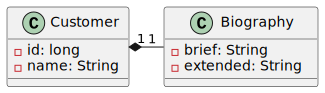

In [4]:
//| output: true
//| echo: false
//| label: fig-uml-onetoone
//| fig-cap: "Un Customer a une Biography"
// PRINT SCHEMA
String script="""
@startuml
class Biography {
    - brief: String
    - extended: String
}
class Customer {
    - id: long
    - name: String
}

Customer "1" *-right- "1" Biography
@enduml""";
    

IJava.getKernelInstance().getMagics().applyCellMagic("plantUML",List.of(),script);  
return null;

:::

::: {.column width="50%"}

In [5]:
//| output: true
//| echo: false
//| label: fig-rel-onetoone
//| fig-cap: "L'unique relation CUSTOMER"
// PRINT SCHEMA
String script="%";

IJava.getKernelInstance().getMagics().applyCellMagic("rdbmsSchema",
  List.of(System.getProperty("jakarta.persistence.jdbc.url"),
        System.getProperty("jakarta.persistence.jdbc.user"),
        System.getProperty("jakarta.persistence.jdbc.password"),
        "ex_biography"),script);  
return null;

EvalException: null

:::
::::

::: {.content-visible when-profile="notes"}
Pour cela JPA propose des annotations spécifiques :

[\@Embeddable](https://jakarta.ee/specifications/persistence/3.1/apidocs/jakarta.persistence/jakarta/persistence/embeddable): Cette annotation indique que les membres d'une classe Java peuvent être persistés en tant qu'attributs de la classe qui les utilise. En d'autres termes, elle spécifie qu'une classe peut être utilisée comme composant réutilisable dont les propriétés peuvent être incorporées dans une autre entité.

[\@Embedded](https://jakarta.ee/specifications/persistence/3.1/apidocs/jakarta.persistence/jakarta/persistence/embedded): Utilisée au niveau d'un membre de classe annoté avec \@Embeddable, cette annotation indique que le membre annoté doit être intégré dans la relation. Cela signifie que les propriétés de la classe annotée avec \@Embeddable seront incluses dans la table de la classe qui les utilise.
:::


::: {.content-visible when-profile="slides"}
- Pour cela, JPA propose :
    - [\@Embeddable](https://jakarta.ee/specifications/persistence/3.1/apidocs/jakarta.persistence/jakarta/persistence/embeddable): Indique que les membres d'une classe peuvent être persistés en tant qu'attributs de la classe qui les utilise.
    - [\@Embedded](https://jakarta.ee/specifications/persistence/3.1/apidocs/jakarta.persistence/jakarta/persistence/embedded): Utilisé avec `@Embeddable` pour intégrer ses propriétés dans une autre entité`
:::

::: {.content-visible when-profile="slides"}
## Un client a une et une seule biographie {.smaller}
:::

:::: {.columns}

::: {.column width="50%"}

In [6]:
//| output: true
//| echo: false
//| label: fig-class-embeddable
//| filename: 
//| fig-cap: Embeddable.java
//| fig-link: /code-server/?folder=/home/jovyan/work/src/github/ebpro/sample-hellojpa/src/main/java/fr/univtln/bruno/demos/jpa/hello/samples/ex_biography/Biography.java
// PRINT CLASS
String script="/home/jovyan/work/src/github/ebpro/sample-hellojpa/src/main/java/fr/univtln/bruno/demos/jpa/hello/samples/ex_biography/Biography.java";

IJava.getKernelInstance().getMagics().applyCellMagic("javasrcClassByName",List.of("Biography"),script);
return null;

```Java
@Builder
@NoArgsConstructor(access = AccessLevel.PROTECTED)
@AllArgsConstructor

@Embeddable
public class Biography {
    @Column(name = "BIO_BRIEF")
    private String brief;

    @Lob
    @Column(name = "BIO_EXTENDED")
    private String extended;
}
```

:::

::: {.column width="50%"}

In [7]:
//| output: true
//| echo: false
// PRINT CLASS
String script="/home/jovyan/work/src/github/ebpro/sample-hellojpa/src/main/java/fr/univtln/bruno/demos/jpa/hello/samples/ex_biography/Customer.java";

IJava.getKernelInstance().getMagics().applyCellMagic("javasrcClassByName",List.of("Customer"),script);
return null;

```Java
@Getter
@Setter
@ToString
@RequiredArgsConstructor(staticName = "of")
@NoArgsConstructor(access = AccessLevel.PROTECTED)

@Entity
@Table(name = "CUSTOMER", schema = "ex_biography")
public class Customer {
    @Id
    @GeneratedValue
    private long id;

    @Column(length = 50, nullable = false)
    @NonNull
    private String name;

    @Embedded
    @Column()
    private Biography biography;
}
```

:::
::::

In [8]:
//| output: false
//| echo: false
import fr.univtln.bruno.demos.jpa.hello.samples.ex_biography.*;
EntityManagerFactory emf = DatabaseManager.getInstance().getEntityManagerFactory();

CompilationException: 

::: {.content-visible when-profile="notes"}
On peut donc rendre persistentes une instance de Customer associé à une instance de Biography.
:::

In [9]:
//| output: true
//| echo: true
//| code-fold: true
//| code-summary: Creation et persistence d'un Customer
import fr.univtln.bruno.demos.jpa.hello.samples.ex_biography.Customer;
try (EntityManager entityManager = emf.createEntityManager()) {
   entityManager.getTransaction().begin();
            
   Customer customer = Customer.of("Jim");
   customer.setBiography(Biography.builder()
      .brief("bla")
      .extended("bla bla")
      .build());
   entityManager.persist(customer);
            
   entityManager.getTransaction().commit();
}

CompilationException: 

::: {.content-visible when-profile="notes"}
dans une seule relation
:::

In [10]:
//| output: true
//| echo: false
//| label: fig-table-onetoone
//| fig-cap: "La table CUSTOMER"
// PRINT RELATION
String script="SELECT * FROM ex_biography.CUSTOMER";
IJava.getKernelInstance().getMagics().applyCellMagic("sqlAsTable",
  List.of(System.getProperty("jakarta.persistence.jdbc.url"),
        System.getProperty("jakarta.persistence.jdbc.user"),
        System.getProperty("jakarta.persistence.jdbc.password")),script);
return null;

EvalException: null

## One to Many (1-N)

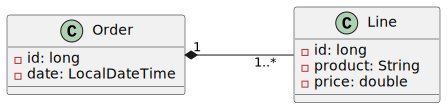

In [11]:
//| output: true
//| echo: false
//| label: fig-uml-onetomany
//| fig-cap: "Une Order a plusieurs Line"
// PRINT SCHEMA
String script="""
@startuml
class Order {
    - id: long
    - date: LocalDateTime
}
class Line {
    - id: long
    - product: String
    - price: double
}

Order "1" *-r- "1..*" Line :"         "
@enduml""";
    

IJava.getKernelInstance().getMagics().applyCellMagic("plantUML",List.of(),script);  
return null;

:::: {.columns}

::: {.column width="50%"}

In [12]:
//| output: true
//| echo: false
// PRINT CLASS
String script="/home/jovyan/work/src/github/ebpro/sample-hellojpa/src/main/java/fr/univtln/bruno/demos/jpa/hello/samples/ex_associations/ex_onetomany_b/Line.java";

IJava.getKernelInstance().getMagics().applyCellMagic("javasrcClassByName",List.of("Line"),script);
return null;

```Java
@Getter
@Setter
@ToString
@RequiredArgsConstructor(staticName = "of")
@NoArgsConstructor(access = AccessLevel.PROTECTED)

@Embeddable
@Table(name = "LINE", schema = "EX_ONE_TO_MANY_B")
public class Line {
    @NonNull
    private String product;
    @NonNull
    private double price;
}
```

:::

::: {.column width="50%"}

In [13]:
//| output: true
//| echo: false
// PRINT CLASS
String script="/home/jovyan/work/src/github/ebpro/sample-hellojpa/src/main/java/fr/univtln/bruno/demos/jpa/hello/samples/ex_associations/ex_onetomany_b/Order.java";

IJava.getKernelInstance().getMagics().applyCellMagic("javasrcClassByName",List.of("Order"),script);
return null;

```Java
@Getter
@Setter
@ToString
@NoArgsConstructor
@Builder
@AllArgsConstructor

@Entity
@Table(name = "EORDER", schema = "EX_ONE_TO_MANY_B")
public class Order {
    @Id
    @GeneratedValue(strategy = GenerationType.SEQUENCE)
    private long id;

    @Builder.Default
    @Column(nullable = false)
    private LocalDateTime date = LocalDateTime.now();

    @ElementCollection
    @CollectionTable(name = "LINE", schema = "EX_ONE_TO_MANY_B")
    @Singular
    private Set<Line> lines = new HashSet<>();

}
```

:::

::::

In [14]:
//| output: true
//| echo: false
//| label: fig-rel-onetomanyb
//| fig-cap: "Les relations LINE et EORDER"
// PRINT SCHEMA
String script="%";
IJava.getKernelInstance().getMagics().applyCellMagic("rdbmsSchema",
  List.of(System.getProperty("jakarta.persistence.jdbc.url"),
        System.getProperty("jakarta.persistence.jdbc.user"),
        System.getProperty("jakarta.persistence.jdbc.password"),"ex_one_to_many_b"),script);  
return null;

EvalException: null

::: {.content-visible when-profile="notes"}
### Avec deux entités

Dans le cas général, l'attribut de type `Collection<T>` est annoté avec `@OneToMany`.

L'attribut optionnel `mappedBy` indique le nom de l'attribut correspondant dans le type `T` si l'on souhaite une relation bi-directionnelle. L'autre entité (de Type `T`) est alors annotée avace `@ManyToOne`
:::

::: {.content-visible when-profile="slides"}
## Avec deux entités

- Dans le cas général :
    - L'attribut de type `Collection<T>` est annoté avec `@OneToMany`.
    - Pour une relation bidirectionnelle, l'autre entité (de type `T`) est annotée avec `@ManyToOne`.
    - L'attribut optionnel `mappedBy` indique le nom de l'attribut correspondant dans le type `T` si l'on souhaite une relation bidirectionnelle.

:::

::: {.content-visible when-profile="slides"}

## 1 to N à deux entités (1/3)

:::

In [15]:
//| output: true
//| echo: false
// PRINT CLASS
String script="/home/jovyan/work/src/github/ebpro/sample-hellojpa/src/main/java/fr/univtln/bruno/demos/jpa/hello/samples/ex_associations/ex_onetomany_a/Order.java";

IJava.getKernelInstance().getMagics().applyCellMagic("javasrcClassByName",List.of("Order"),script);
return null;

```Java
@Getter
@Setter
@ToString
@NoArgsConstructor

@Entity
@Table(name = "EORDER", schema = "EX_ONE_TO_MANY_A")
public class Order {
    @Id
    @GeneratedValue(strategy = GenerationType.SEQUENCE)
    private long id;

    private LocalDateTime date = LocalDateTime.now();

    @OneToMany(mappedBy = "order",
            cascade = {CascadeType.PERSIST,
                    CascadeType.REMOVE},
            orphanRemoval = true)
    @ToString.Exclude
    private Set<Line> lines = new HashSet<>();

    public Order addLine(Line line) {
        line.setOrder(this);
        lines.add(line);
        return this;
    }

    public Order removeLine(Line line) {
        line.setOrder(null);
        lines.remove(line);
        return this;
    }
}
```

::: {.content-visible when-profile="slides"}

## 1 to N à deux entités (2/3)

:::

In [16]:
//| output: true
//| echo: false
// PRINT CLASS
String script="/home/jovyan/work/src/github/ebpro/sample-hellojpa/src/main/java/fr/univtln/bruno/demos/jpa/hello/samples/ex_associations/ex_onetomany_a/Line.java";

IJava.getKernelInstance().getMagics().applyCellMagic("javasrcClassByName",List.of("Line"),script);
return null;

```Java
@Getter
@Setter
@ToString
@RequiredArgsConstructor(staticName = "of")
@NoArgsConstructor(access = AccessLevel.PROTECTED)

@Entity
@Table(name = "LINE", schema = "EX_ONE_TO_MANY_A")
public class Line {
    @Id
    @GeneratedValue(strategy = GenerationType.SEQUENCE)
    private long id;
    @NonNull
    private String product;
    @NonNull
    private double price;

    @ManyToOne
    @JoinColumn(nullable = false)
    @ToString.Exclude
    private Order order;

    public void setOrder(Order order) {
        if (this.order != null) {
            this.order.getLines().remove(this);
        }
        this.order = order;
        if (order != null) {
            order.getLines().add(this);
        }
    }
}
```

::: {.content-visible when-profile="slides"}

## 1 to N à deux entités (3/3)

:::

In [17]:
//| output: false
//| echo: false
import fr.univtln.bruno.demos.jpa.hello.samples.ex_associations.ex_onetomany_a.*;
EntityManagerFactory emf = DatabaseManager.getInstance().getEntityManagerFactory();
final Logger log = LoggerFactory.getLogger("notebook");

CompilationException: 

In [18]:
//| code-fold: true
//| code-summary: Creation et persistence d'une commande et de ses lignes.

Order order1 = new Order()
                .addLine(Line.of("Pen", 1.0))
                .addLine(Line.of("Paper", 5.0))
                .addLine(Line.of("Scissor", 8.0));
Order order2 = new Order()
                .addLine(Line.of("Car", 20000))
                .addLine(Line.of("Moto", 8000));

try (EntityManager entityManager = emf.createEntityManager()) {
            entityManager.getTransaction().begin();
            entityManager.persist(order1);
            entityManager.persist(order2);
            entityManager.getTransaction().commit();
        }

try (EntityManager entityManager = emf.createEntityManager()) {
            Order order=entityManager.find(Order.class, 1L);
            log.info("{} {}",order, order.getLines());
        }

CompilationException: 

In [19]:
//| output: true
//| echo: false
//| label: fig-rel-onetomanya
//| fig-cap: "Les relations LINE et EORDER"
// PRINT SCHEMA
String script="%";

IJava.getKernelInstance().getMagics().applyCellMagic("rdbmsSchema",
  List.of(System.getProperty("jakarta.persistence.jdbc.url"),
        System.getProperty("jakarta.persistence.jdbc.user"),
        System.getProperty("jakarta.persistence.jdbc.password"),"ex_one_to_many_a"),script);  
return null;

EvalException: null

In [20]:
//| output: true
//| echo: false
//| label: fig-rel-onetomanya-query
//| fig-cap: "SELECT * FROM EORDER INNER JOIN LINE"
// PRINT RELATION
String script="""
SELECT EORDER.id AS order_id,
                       EORDER.date AS order_date,
                       LINE.id AS line_id,
                       LINE.product,
                       LINE.price
                FROM EX_ONE_TO_MANY_A.EORDER AS EORDER
                    INNER JOIN EX_ONE_TO_MANY_A.LINE AS LINE
                    ON EORDER.id = LINE.order_id
                    ORDER BY EORDER.id,LINE.id""";
IJava.getKernelInstance().getMagics().applyCellMagic("sqlAsTable",
  List.of(System.getProperty("jakarta.persistence.jdbc.url"),
        System.getProperty("jakarta.persistence.jdbc.user"),
        System.getProperty("jakarta.persistence.jdbc.password")),script);
return null;

EvalException: null

## Many to Many (N-M)

::: {.content-visible when-profile="notes"}
L'annotation \@ManyToMany en Java Persistence API (JPA) est utilisée pour modéliser une relation many-to-many entre deux entités. La table d'association sera alors générée et utilisée implicitement.
:::

::: {.content-visible when-profile="slides"}
- \@ManyToMany en Java Persistence API (JPA) :
    - Utilisée pour modéliser une relation many-to-many entre deux entités.
    - La table d'association est générée et utilisée implicitement.
:::

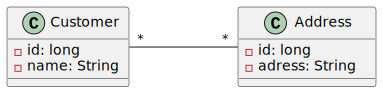

In [21]:
//| output: true
//| echo: false
//| label: fig-uml-manytomany
//| fig-cap: "Un Customer a plusieurs adresses (qui peuvent être associées à d'autres)"
// PRINT SCHEMA
String script="""
@startuml
class Customer {
    - id: long
    - name: String
}
class Address {
    - id: long
    - adress: String
}

Customer "*" -right- "*" Address :"         "
@enduml""";
    

IJava.getKernelInstance().getMagics().applyCellMagic("plantUML",List.of(),script);  
return null;

In [22]:
//| output: true
//| echo: false
//| label: fig-rel-manytomany
//| fig-cap: "Les relation CUSTOMER, ADDRESS et la relation de d'association"
// PRINT SCHEMA
String script="%";

IJava.getKernelInstance().getMagics().applyCellMagic("rdbmsSchema",
  List.of(System.getProperty("jakarta.persistence.jdbc.url"),
        System.getProperty("jakarta.persistence.jdbc.user"),
        System.getProperty("jakarta.persistence.jdbc.password"),"ex_many_to_many"),script);  
return null;

EvalException: null

::: {.content-visible when-profile="slides"}
## Many to Many (1/2)
:::

:::: {.columns}

::: {.column width="50%"}

In [23]:
//| output: true
//| echo: false
// PRINT CLASS
String script="/home/jovyan/work/src/github/ebpro/sample-hellojpa/src/main/java/fr/univtln/bruno/demos/jpa/hello/samples/ex_associations/ex_manytomany/Customer.java";

IJava.getKernelInstance().getMagics().applyCellMagic("javasrcClassByName",List.of("Customer"),script);
return null;

```Java
@Getter
@Setter
@ToString
@RequiredArgsConstructor(staticName = "of")
@NoArgsConstructor(access = AccessLevel.PROTECTED)

@Entity
@Table(name = "CUSTOMER", schema = "EX_MANY_TO_MANY")
public class Customer {
    @Id
    @GeneratedValue
    private long id;

    @NonNull
    private String name;

    @ManyToMany
    @ToString.Exclude
    @JoinTable(schema = "EX_MANY_TO_MANY")
    private Set<Address> places = new HashSet<>();

    public void addPlace(Address address) {
        this.places.add(address);
        address.getOccupants().add(this);
    }

    public void removePlace(Address address) {
        this.places.remove(address);
        address.getOccupants().remove(this);
    }
}
```

:::

::: {.column width="50%"}

In [24]:
//| output: true
//| echo: false
// PRINT CLASS
String script="/home/jovyan/work/src/github/ebpro/sample-hellojpa/src/main/java/fr/univtln/bruno/demos/jpa/hello/samples/ex_associations/ex_manytomany/Address.java";

IJava.getKernelInstance().getMagics().applyCellMagic("javasrcClassByName",List.of("Address"),script);
return null;

```Java
@Getter
@Setter
@ToString
@RequiredArgsConstructor(staticName = "of")
@NoArgsConstructor(access = AccessLevel.PROTECTED)

@Entity
@Table(name = "ADDRESS", schema = "EX_MANY_TO_MANY")
public class Address {
    @Id
    @GeneratedValue
    private long id;

    @NonNull
    private String addressDetail;

    @ManyToMany(mappedBy = "places")
    @ToString.Exclude
    private Set<Customer> occupants= new HashSet<>();

    public void addOccupant(Customer customer) {
        this.occupants.add(customer);
        customer.getPlaces().add(this);
    }

    public void removeOccupant(Customer customer) {
        this.occupants.remove(customer);
        customer.getPlaces().remove(this);
    }

}
```

:::

::::

In [25]:
%maven net.datafaker:datafaker:2.0.2
import net.datafaker.Faker;
import java.util.stream.Stream;

import fr.univtln.bruno.demos.jpa.hello.samples.ex_associations.ex_manytomany.Address;
import fr.univtln.bruno.demos.jpa.hello.samples.ex_associations.ex_manytomany.Customer;

::: {.content-visible when-profile="slides"}

## Many to Many (2/2)

:::

In [26]:
//| code-fold: true
//| code-summary: Creation et persistence de Customers et d'Addresses.

Faker faker = new Faker();

int nbAddresses = 2;
int nbCustomers = 5;

try (EntityManager entityManager = emf.createEntityManager()) {
            entityManager.getTransaction().begin();
Stream.generate(faker.address()::fullAddress)
                    .map(Address::of)
                    .limit(nbAddresses)
                    .forEach(entityManager::persist);

             TypedQuery<Address> query = entityManager.createQuery("""
                    SELECT a
                    FROM Address a
                    ORDER BY random()""", Address.class);
        
            Stream.generate(faker.name()::fullName)
                    .map(Customer::of)
                    .limit(nbCustomers)
                    .forEach(c -> query.setMaxResults(ThreadLocalRandom.current().nextInt(2) + 1)
                            .getResultList()
                            .stream()
                            .map(a -> {
                                c.getPlaces().add(a);
                                return c;
                            })
                            .forEach(entityManager::persist));
 entityManager.getTransaction().commit();
        } 

CompilationException: 

:::: {.columns}

::: {.column width="50%"}

In [27]:
//| output: true
//| echo: false
//| label: fig-table-onetoone1
//| fig-cap: "La table CUSTOMER"
// PRINT RELATION
String script="SELECT * FROM EX_MANY_TO_MANY.CUSTOMER";
IJava.getKernelInstance().getMagics().applyCellMagic("sqlAsTable",
  List.of(System.getProperty("jakarta.persistence.jdbc.url"),
        System.getProperty("jakarta.persistence.jdbc.user"),
        System.getProperty("jakarta.persistence.jdbc.password")),script);
return null;

EvalException: null

:::

::: {.column width="50%"}

In [28]:
//| output: true
//| echo: false
//| label: fig-table-onetoone-3
//| fig-cap: "La table de jointure"
// PRINT RELATION
String script="SELECT * FROM EX_MANY_TO_MANY.CUSTOMER_ADDRESS ORDER BY places_id, occupants_id";
IJava.getKernelInstance().getMagics().applyCellMagic("sqlAsTable",
  List.of(System.getProperty("jakarta.persistence.jdbc.url"),
        System.getProperty("jakarta.persistence.jdbc.user"),
        System.getProperty("jakarta.persistence.jdbc.password")),script);
return null;

EvalException: null

:::

:::: 

In [29]:
//| output: true
//| echo: false
//| label: fig-table-onetoone-2
//| fig-cap: "La table ADDRESS"
// PRINT RELATION
String script="SELECT * FROM EX_MANY_TO_MANY.ADDRESS";
IJava.getKernelInstance().getMagics().applyCellMagic("sqlAsTable",
  List.of(System.getProperty("jakarta.persistence.jdbc.url"),
        System.getProperty("jakarta.persistence.jdbc.user"),
        System.getProperty("jakarta.persistence.jdbc.password")),script);
return null;    

EvalException: null